<a href="https://colab.research.google.com/github/lokeshvirani/Machine-Learning-Project/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install imblearn
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-learn)


In [149]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate
import pandas as pd


In [70]:
# Load the dataset
data = pd.read_csv('Employee-turnover.csv')
data

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,Research & Development,Laboratory Technician,Male,36,Married,College,Medical,Travel_Frequently,...,17,5,2,0,3,High,3,Better,High,No
1466,1,2062,Research & Development,Healthcare Representative,Male,39,Married,Below College,Medical,Travel_Rarely,...,9,7,7,1,7,Very High,5,Better,Low,No
1467,1,2064,Research & Development,Manufacturing Director,Male,27,Married,Bachelor,Life Sciences,Travel_Rarely,...,6,6,2,0,3,Medium,0,Better,Medium,No
1468,1,2065,Sales,Sales Executive,Male,49,Married,Bachelor,Medical,Travel_Frequently,...,17,9,6,0,8,Very High,3,Good,Very High,No


In [71]:
data.describe()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,0.0,602.024335,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.0,1.000000,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1.0,1020.500000,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1.0,1555.750000,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,1.0,2068.000000,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [72]:
# Describtion of categorical attributes
data.describe(include="object")

,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,9,2,3,5,6,3,4,4,2,4,4,4,2
top,Research & Development,Sales Executive,Male,Married,Bachelor,Life Sciences,Travel_Rarely,High,Very High,No,High,Better,High,No
freq,961,326,882,673,572,606,1043,868,459,1054,451,820,426,1233


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

In [74]:
data.isnull().sum()

,0
Employee Count,0
Employee ID,0
Department,0
Job Role,0
Gender,0
Age,0
Marital Status,0
Education,0
Education Field,0
Business Travel,0


**Data Visualization and EDA**

<Axes: xlabel='Attrition (Yes/No)', ylabel='Salary Hike (%)'>

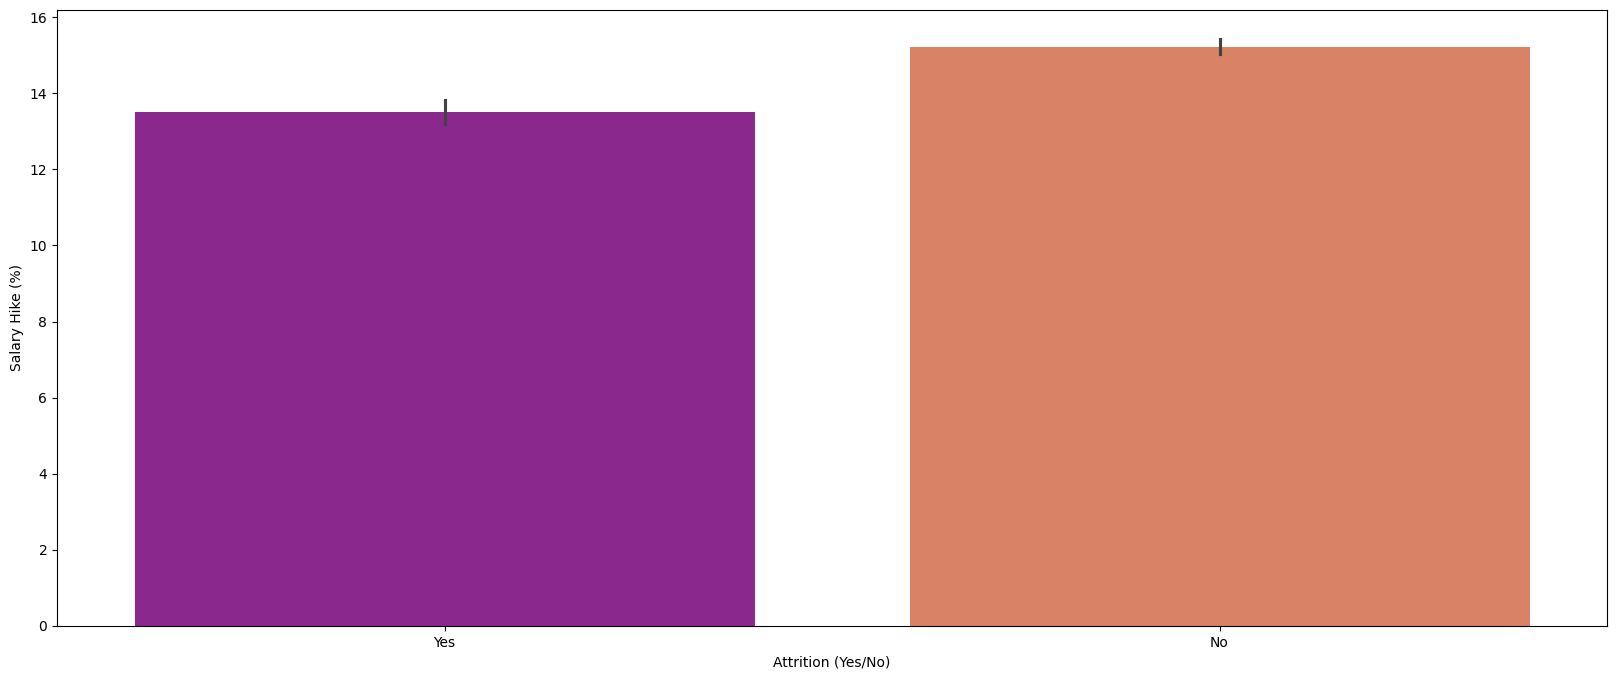

In [75]:
sns.barplot(x ='Attrition (Yes/No)', y ='Salary Hike (%)', data = data, palette ='plasma', hue='Attrition (Yes/No)', legend=False)

<Axes: xlabel='Attrition (Yes/No)', ylabel='Monthly Income (USD)'>

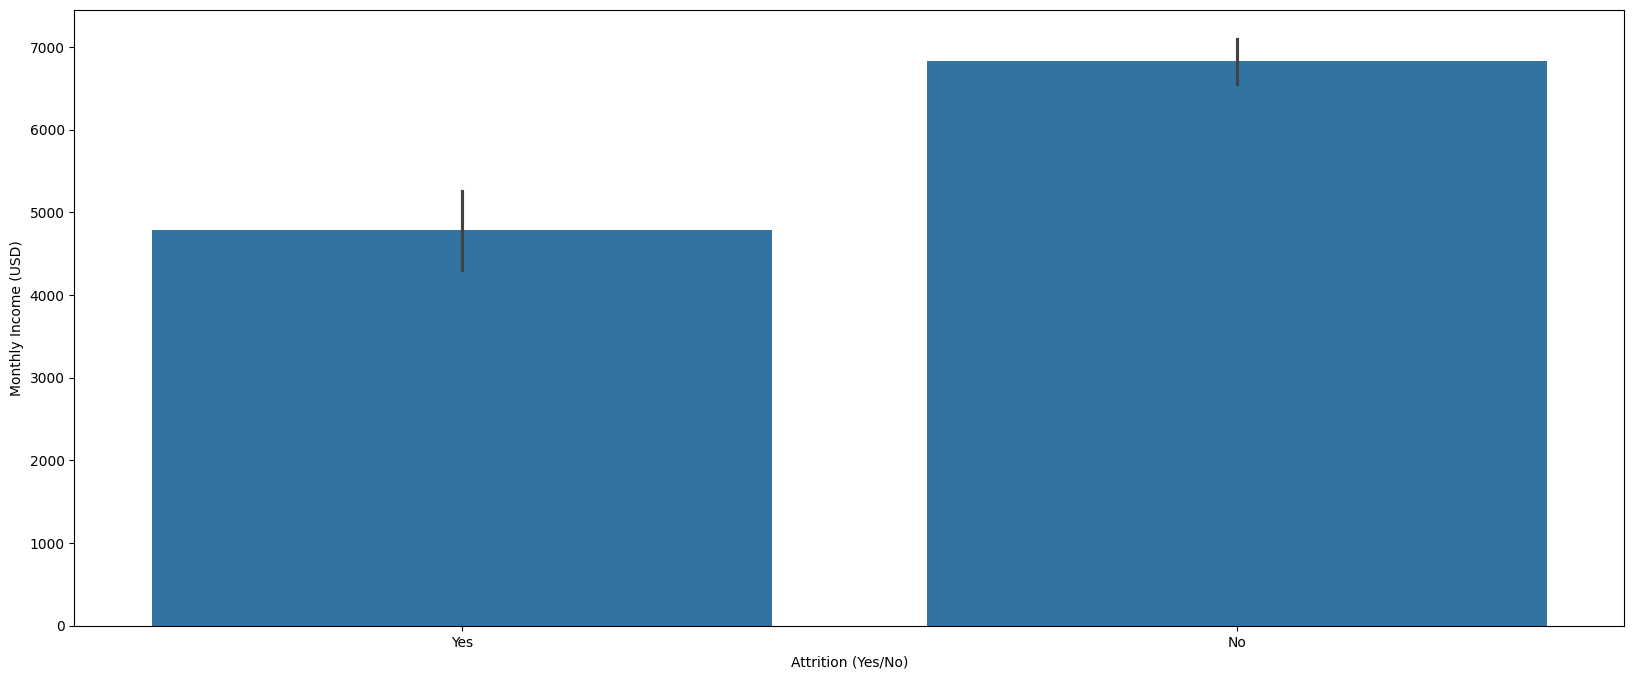

In [76]:
sns.barplot(x ='Attrition (Yes/No)', y ='Monthly Income (USD)', data = data)

<Axes: xlabel='Attrition (Yes/No)', ylabel='Distance From Home (kms)'>

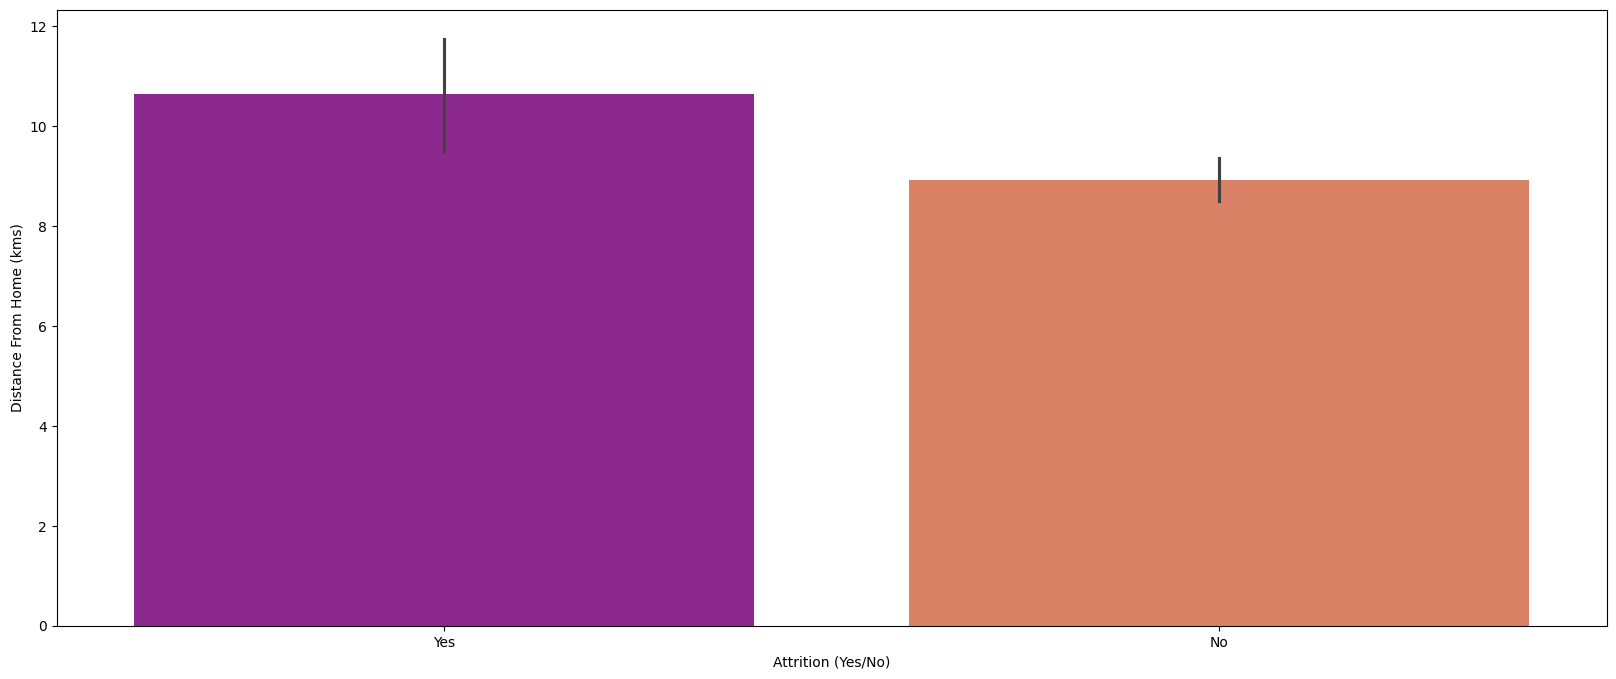

In [77]:
sns.barplot(x ='Attrition (Yes/No)', y ='Distance From Home (kms)', data = data, palette ='plasma', hue='Attrition (Yes/No)', legend=False)

<Axes: xlabel='Gender', ylabel='Monthly Income (USD)'>

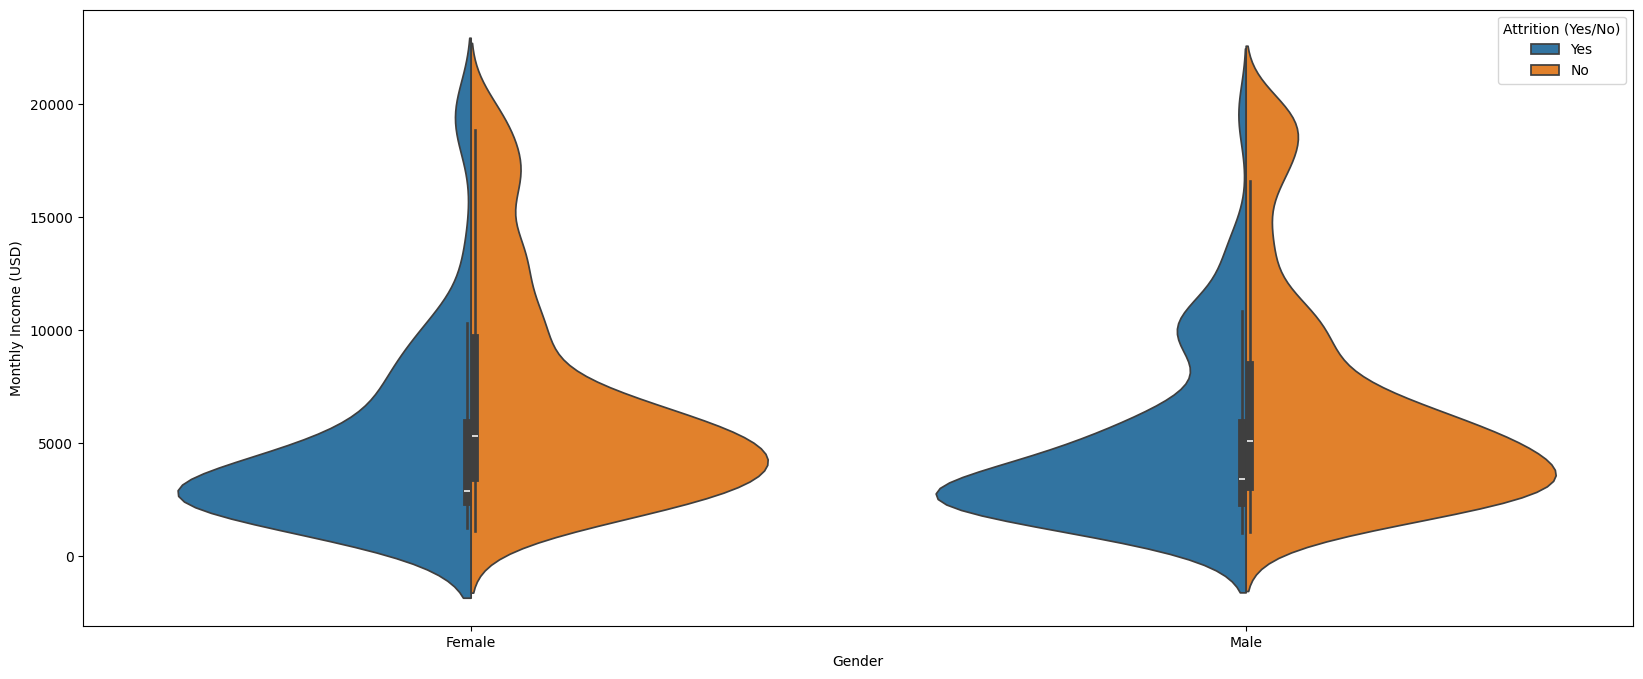

In [78]:
sns.violinplot(x ='Gender', y ='Monthly Income (USD)', data = data, hue ='Attrition (Yes/No)', split = True)

<Axes: xlabel='Job Role', ylabel='Monthly Income (USD)'>

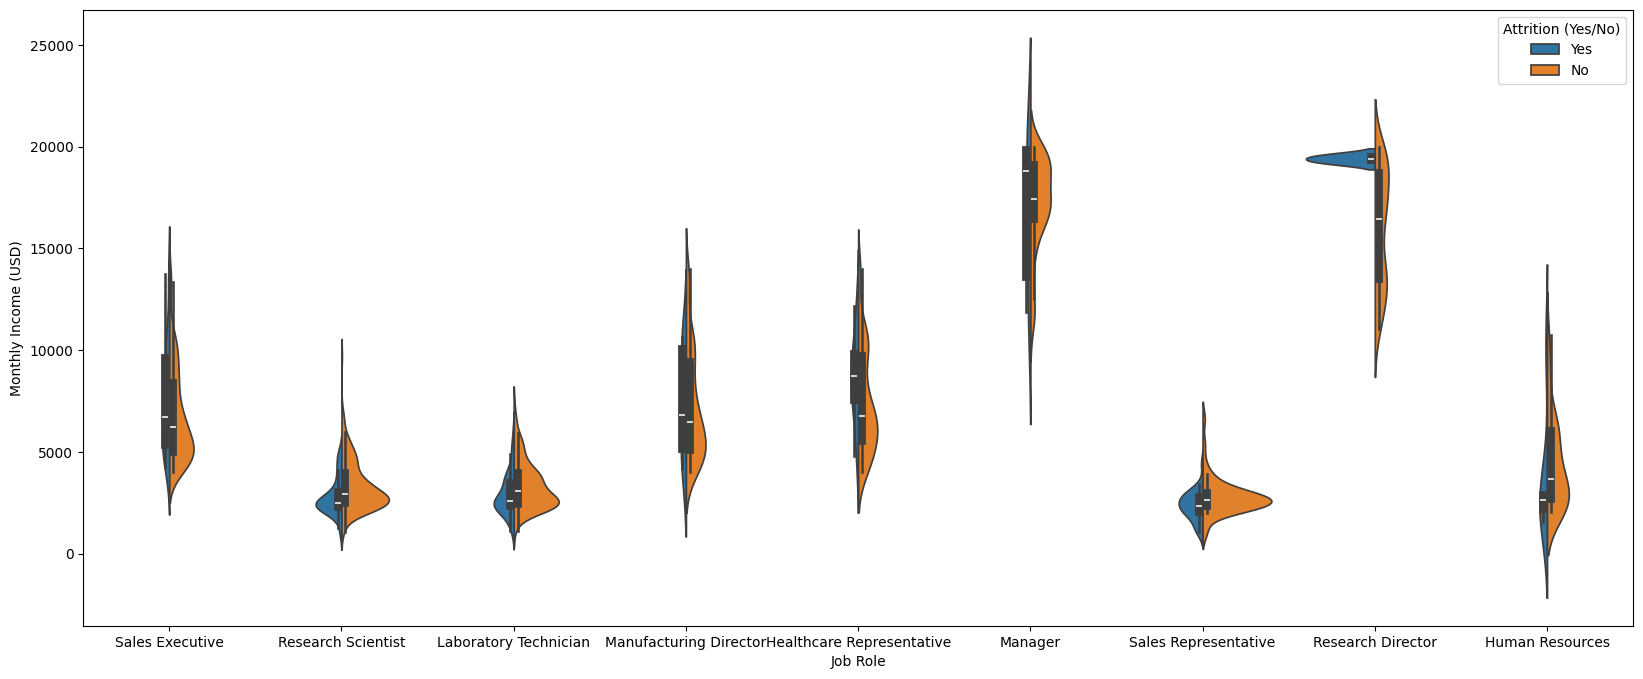

In [79]:
rcParams['figure.figsize'] = 20,8
sns.violinplot(x ='Job Role', y ='Monthly Income (USD)', data = data, hue ='Attrition (Yes/No)', split = True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Job Role', ylabel='Monthly Income (USD)'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


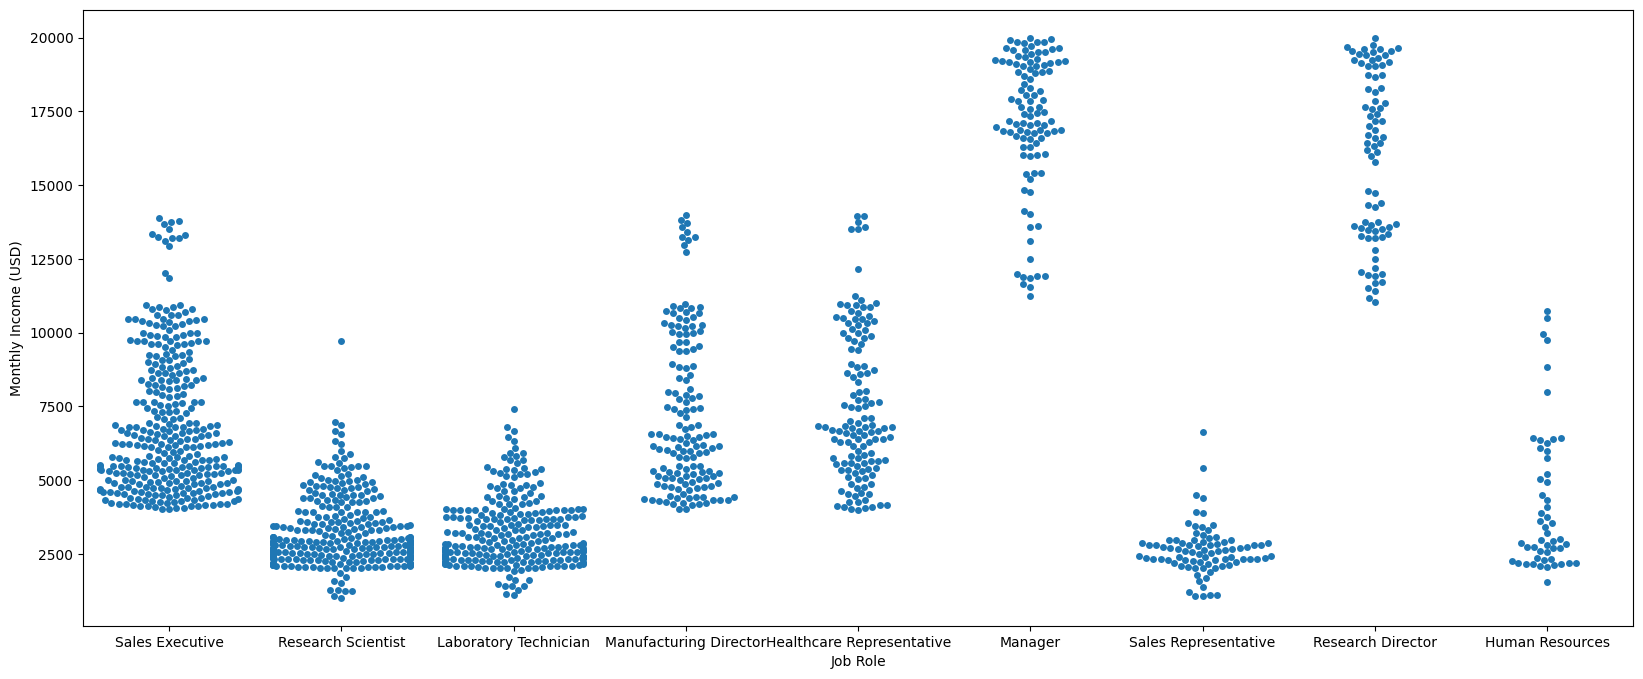

In [80]:
sns.swarmplot(x ='Job Role', y ='Monthly Income (USD)', data = data )

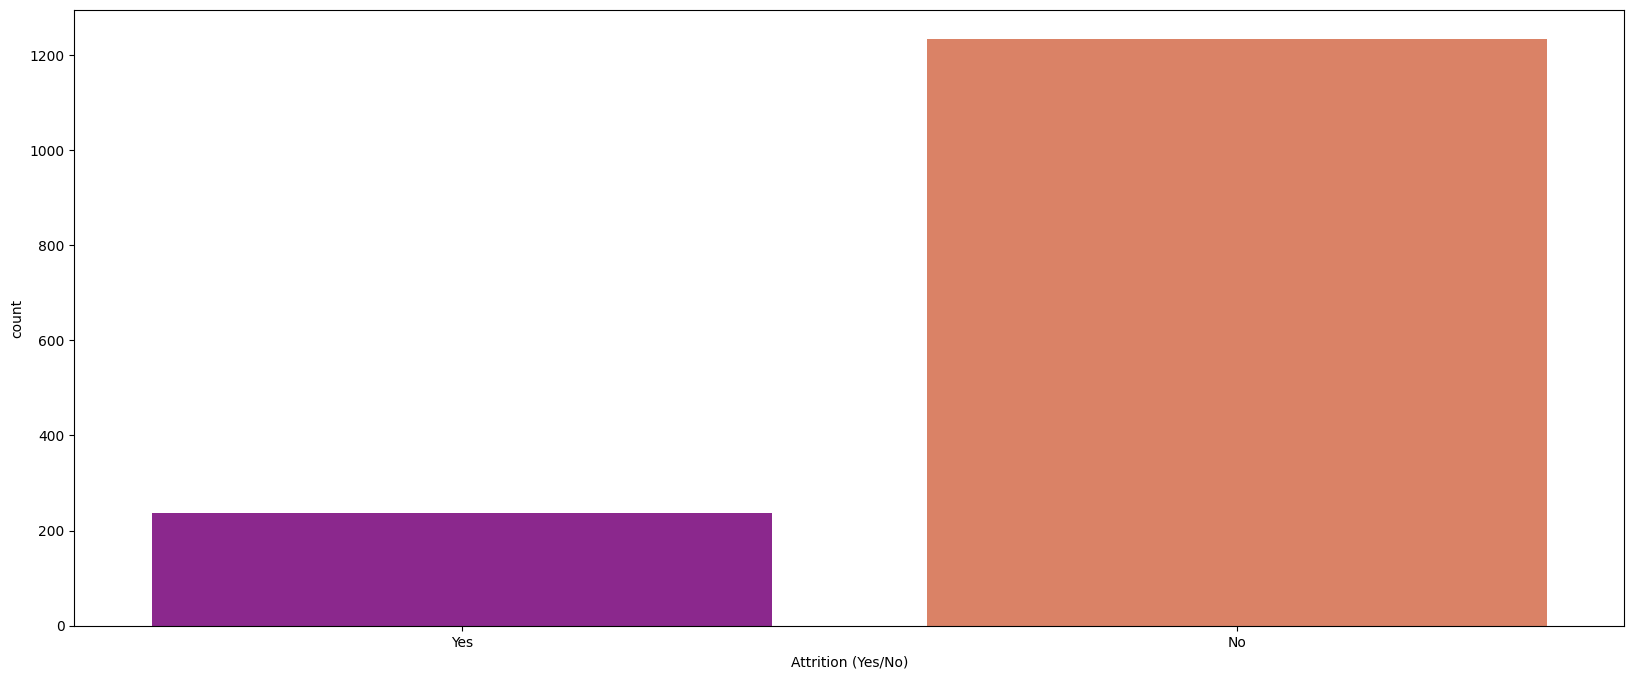

In [81]:
sns.countplot(x='Attrition (Yes/No)', data=data , palette ='plasma', hue='Attrition (Yes/No)', legend=False) # Specify 'x' to indicate the column for counting.
plt.show()

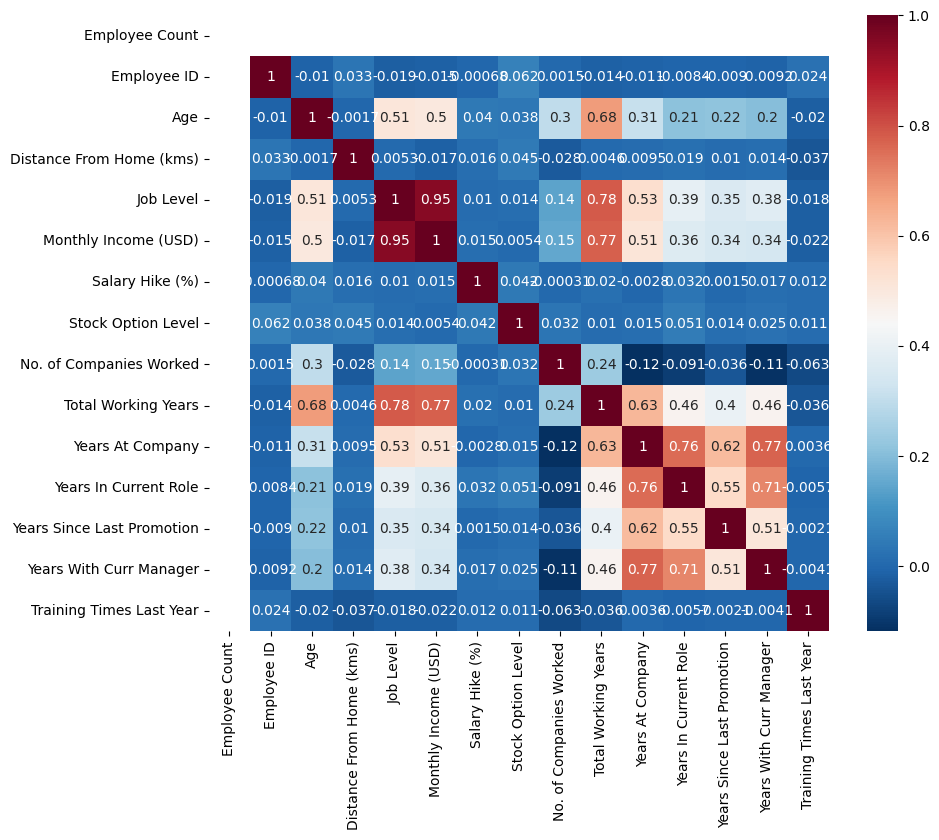

In [82]:
numeric_data = data.select_dtypes(include=['number']) # Select columns with numeric data types
corrs = numeric_data.corr()  # Calculate correlation matrix using only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [83]:
# Converting categorical variables to numerical variables
from sklearn.preprocessing import LabelEncoder
cols = ["Department", "Job Role", "Gender", "Marital Status", "Education", "Education Field", "Business Travel", "Job Involvement", "Job Satisfaction", "Over Time", "Environment Satisfaction","Work Life Balance", "Relationship Satisfaction", "Attrition (Yes/No)"]

le = LabelEncoder()
for i in cols:
    data[i] = le.fit_transform(data[i])
data

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,2,7,0,41,2,2,1,2,...,8,6,4,0,5,2,0,0,1,1
1,1,2,1,6,1,49,1,1,1,1,...,10,10,7,1,7,0,3,2,3,0
2,1,4,1,2,1,37,2,2,4,2,...,7,0,0,0,0,1,3,0,2,1
3,1,5,1,6,0,33,1,4,1,1,...,8,8,7,3,0,3,3,2,0,0
4,1,7,1,2,1,27,1,1,3,2,...,6,2,2,2,2,1,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,1,2,1,36,1,2,3,1,...,17,5,2,0,3,0,3,2,0,0
1466,1,2062,1,0,1,39,1,1,3,2,...,9,7,7,1,7,3,5,2,1,0
1467,1,2064,1,4,1,27,1,0,1,2,...,6,6,2,0,3,2,0,2,2,0
1468,1,2065,2,7,1,49,1,0,3,1,...,17,9,6,0,8,3,3,3,3,0


In [84]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,1:28]
Y = array[:,28]

# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [85]:
print("The number of features selected are", fit.n_features_)

The number of features selected are 15


In [86]:
fit.support_

array([False,  True, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True])

In [87]:
print("The ranking will be: ")
fit.ranking_

The ranking will be: 


array([13,  1, 10,  1, 11,  1,  2,  7,  8,  9,  6,  1,  1, 12,  1,  1,  1,
        3,  5,  4,  1,  1,  1,  1,  1,  1,  1])

In [88]:
print("The initial shape of the dataset was", data.shape)

The initial shape of the dataset was (1470, 29)


In [89]:
# Drop the less important features
cols = ['Employee Count','Employee ID','Job Role','Age','Education','Education Field','Business Travel','Distance From Home (kms)','Job Involvement','Monthly Income (USD)','No. of Companies Worked','Total Working Years','Years At Company']
data.drop(cols,axis=1,inplace=True)

In [90]:
print("The shape of the dataset after deleting features", data.shape)

The shape of the dataset after deleting features (1470, 16)


In [91]:
from collections import Counter
y2 = data['Attrition (Yes/No)']
x2 = data.drop(['Attrition (Yes/No)'], axis = 1)

In [92]:
y2

,Attrition (Yes/No)
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [93]:
x2

,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1
1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3
2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2
3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0
4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,1,2,3,17,1,0,2,0,3,0,3,2,0
1466,1,1,1,3,1,15,1,0,7,1,7,3,5,2,1
1467,1,1,1,2,2,20,1,1,2,0,3,2,0,2,2
1468,2,1,1,2,2,14,0,0,6,0,8,3,3,3,3


In [95]:
from imblearn.combine import SMOTETomek

In [97]:
smk = SMOTETomek()
x_smote, y_smote = smk.fit_resample(x2, y2)

In [98]:
print('original dataset shape:', Counter(y2))

original dataset shape: Counter({0: 1233, 1: 237})


In [99]:
print('SMOTE Sampled dataset shape:', Counter(y_smote))

SMOTE Sampled dataset shape: Counter({1: 1227, 0: 1227})


In [100]:
x_smote

,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1
1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3
2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2
3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0
4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1,0,1,1,2,14,0,0,0,0,0,0,2,0,1
2450,0,0,1,1,2,12,0,0,0,0,0,2,2,0,1
2451,1,0,1,1,1,12,0,0,0,0,0,0,5,3,1
2452,1,0,1,1,1,11,1,0,0,0,0,0,2,0,0


In [101]:
y_smote

,Attrition (Yes/No)
0,1
1,0
2,1
3,0
4,0
...,...
2449,1
2450,1
2451,1
2452,1


In [102]:
df = pd.DataFrame(x_smote)
df['Attrition (Yes/No)'] = y_smote
df

,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1,1
1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3,0
2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2,1
3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0,0
4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1,0,1,1,2,14,0,0,0,0,0,0,2,0,1,1
2450,0,0,1,1,2,12,0,0,0,0,0,2,2,0,1,1
2451,1,0,1,1,1,12,0,0,0,0,0,0,5,3,1,1
2452,1,0,1,1,1,11,1,0,0,0,0,0,2,0,0,1


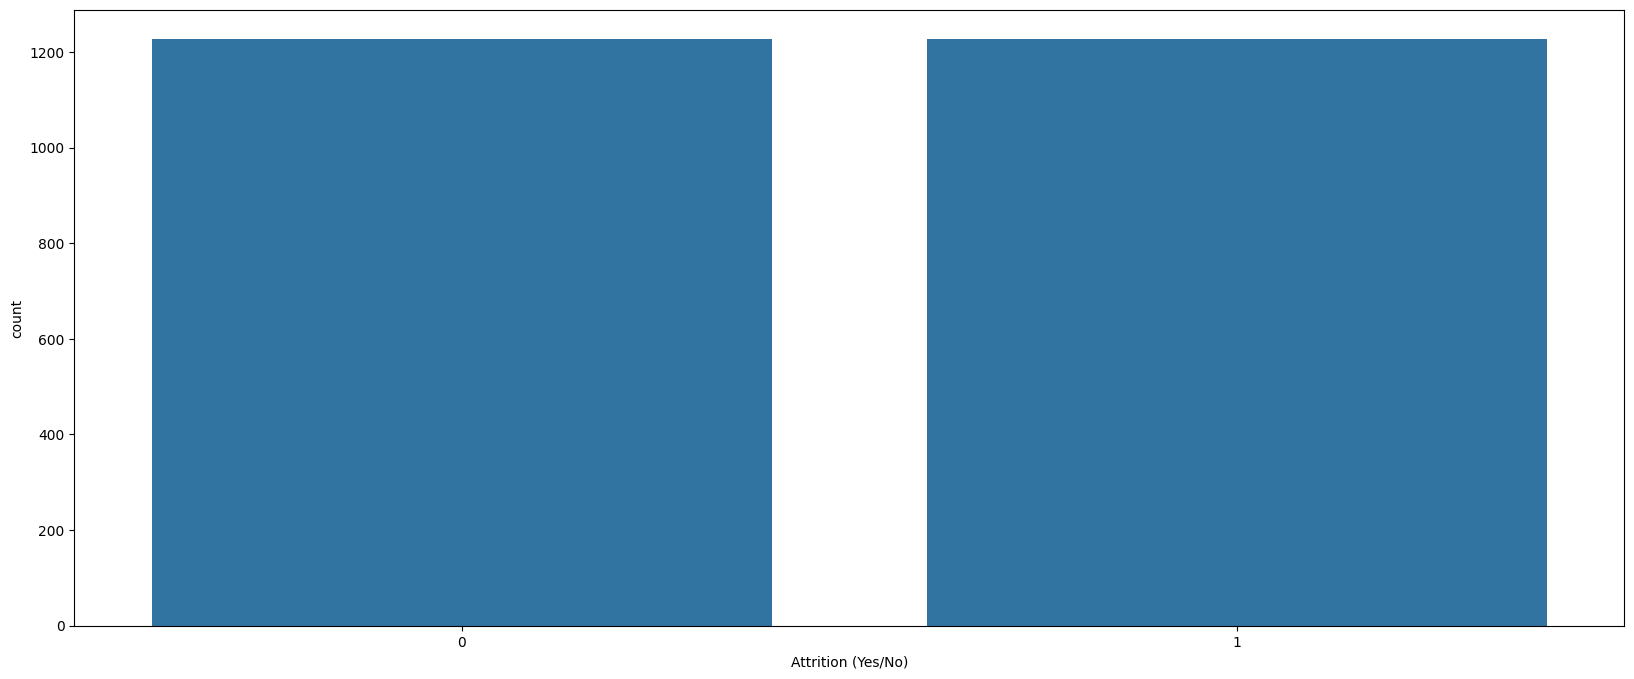

In [107]:
sns.countplot(x='Attrition (Yes/No)', data=df) # Now after sampling data is balanced
plt.show()

In [108]:
print("The final dataset after performing preprocessing is")
df

The final dataset after performing preprocessing is


,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1,1
1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3,0
2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2,1
3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0,0
4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1,0,1,1,2,14,0,0,0,0,0,0,2,0,1,1
2450,0,0,1,1,2,12,0,0,0,0,0,2,2,0,1,1
2451,1,0,1,1,1,12,0,0,0,0,0,0,5,3,1,1
2452,1,0,1,1,1,11,1,0,0,0,0,0,2,0,0,1


In [112]:
df.to_csv("cleaned_dataset.csv")

In [113]:
X = df.iloc[:,0:15]
Y = df.iloc[:,-1]

In [114]:
X

,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1
1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3
2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2
3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0
4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1,0,1,1,2,14,0,0,0,0,0,0,2,0,1
2450,0,0,1,1,2,12,0,0,0,0,0,2,2,0,1
2451,1,0,1,1,1,12,0,0,0,0,0,0,5,3,1
2452,1,0,1,1,1,11,1,0,0,0,0,0,2,0,0


In [115]:
Y

,Attrition (Yes/No)
0,1
1,0
2,1
3,0
4,0
...,...
2449,1
2450,1
2451,1
2452,1


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [117]:
X_train.shape

(1717, 15)

In [118]:
X_test.shape

(737, 15)

**Logistic Regression Model**

In [120]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [122]:
print("Logistic regression accuracy is ", metrics.accuracy_score(y_test, logistic_regression.predict(X_test)))

Logistic regression accuracy is  0.8127544097693351


In [124]:
y_pred = logistic_regression.predict(X)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [125]:
y_pred_df = pd.DataFrame({'actual': Y, 'predicted_prob': logistic_regression.predict(X)})
y_pred_df

,actual,predicted_prob
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0
...,...,...
2449,1,1
2450,1,1
2451,1,1
2452,1,1


In [126]:
y_pred1 = logistic_regression.predict(X)
print(classification_report(Y, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1227
           1       0.82      0.84      0.83      1227

    accuracy                           0.83      2454
   macro avg       0.83      0.83      0.83      2454
weighted avg       0.83      0.83      0.83      2454



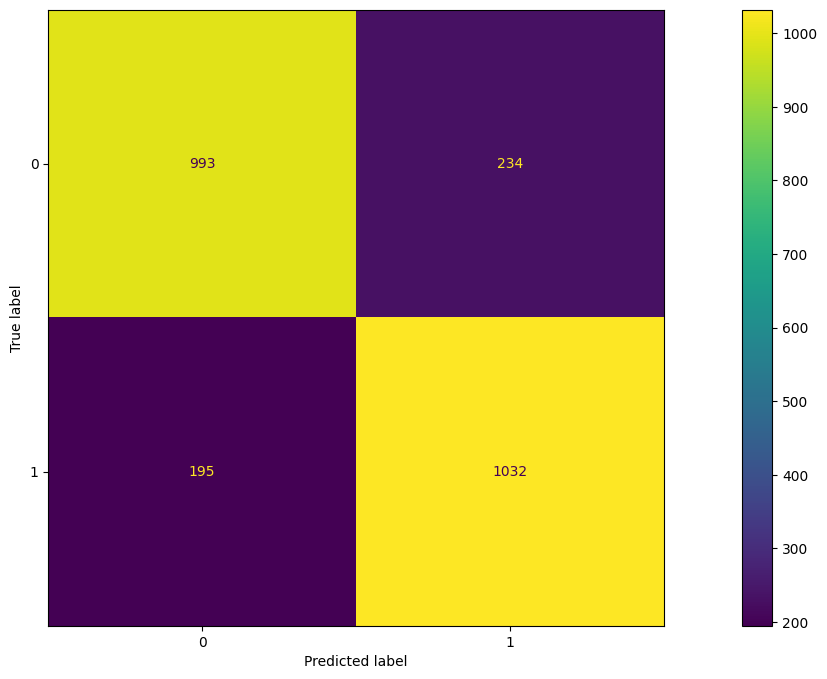

In [127]:
cm = confusion_matrix(Y, y_pred1)
display = metrics.ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

**KNN**

In [128]:
knn_scores = []
for k in range(1,4):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train,y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

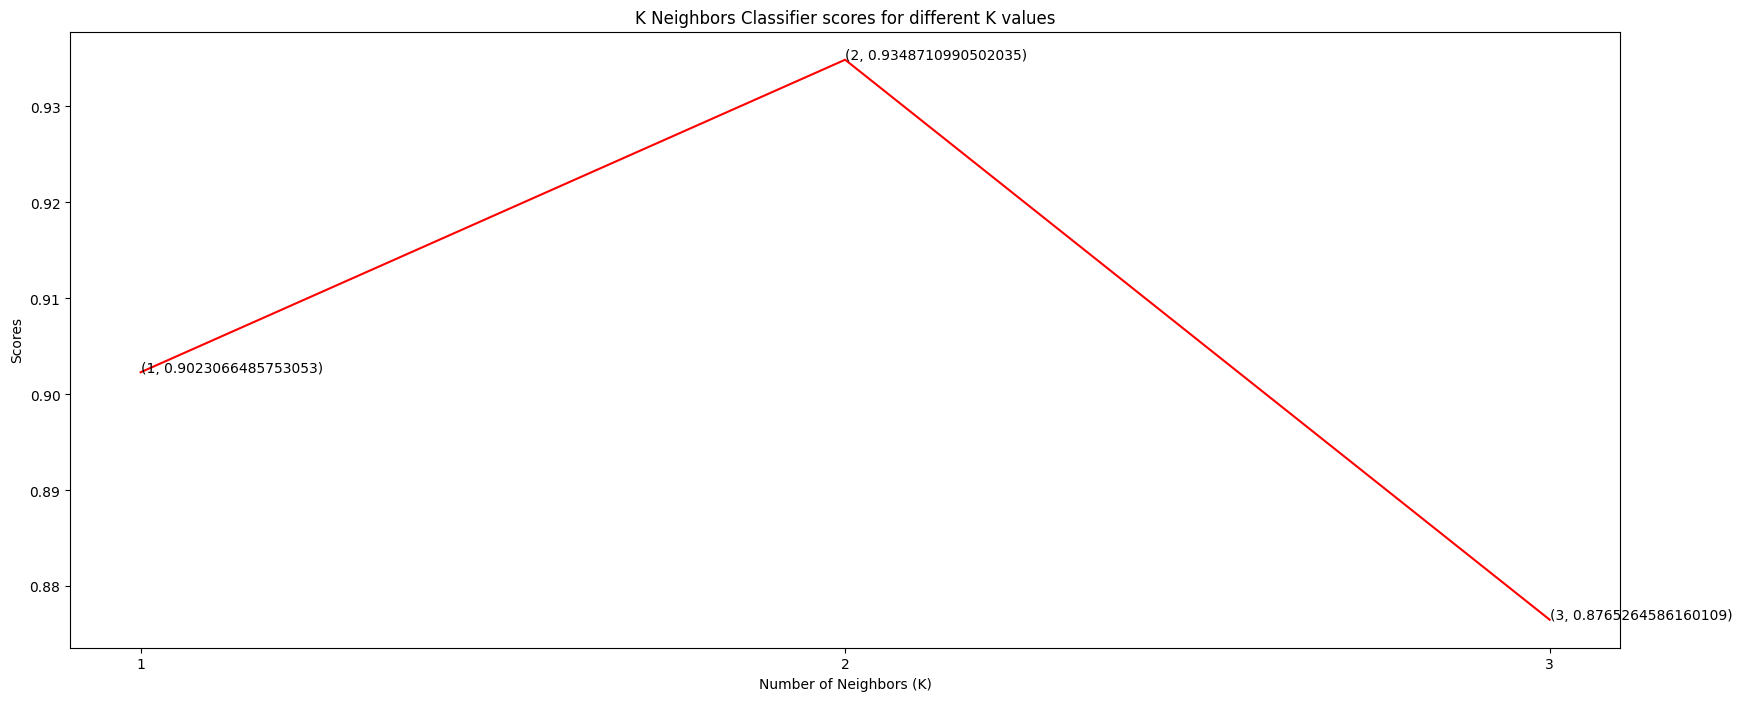

In [129]:
plt.plot([k for k in range(1, 4)], knn_scores, color = 'red')
for i in range(1,4):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 4)])
plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [130]:
y_pred_knn = knn_classifier.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86       373
           1       0.81      0.99      0.89       364

    accuracy                           0.88       737
   macro avg       0.90      0.88      0.88       737
weighted avg       0.90      0.88      0.88       737



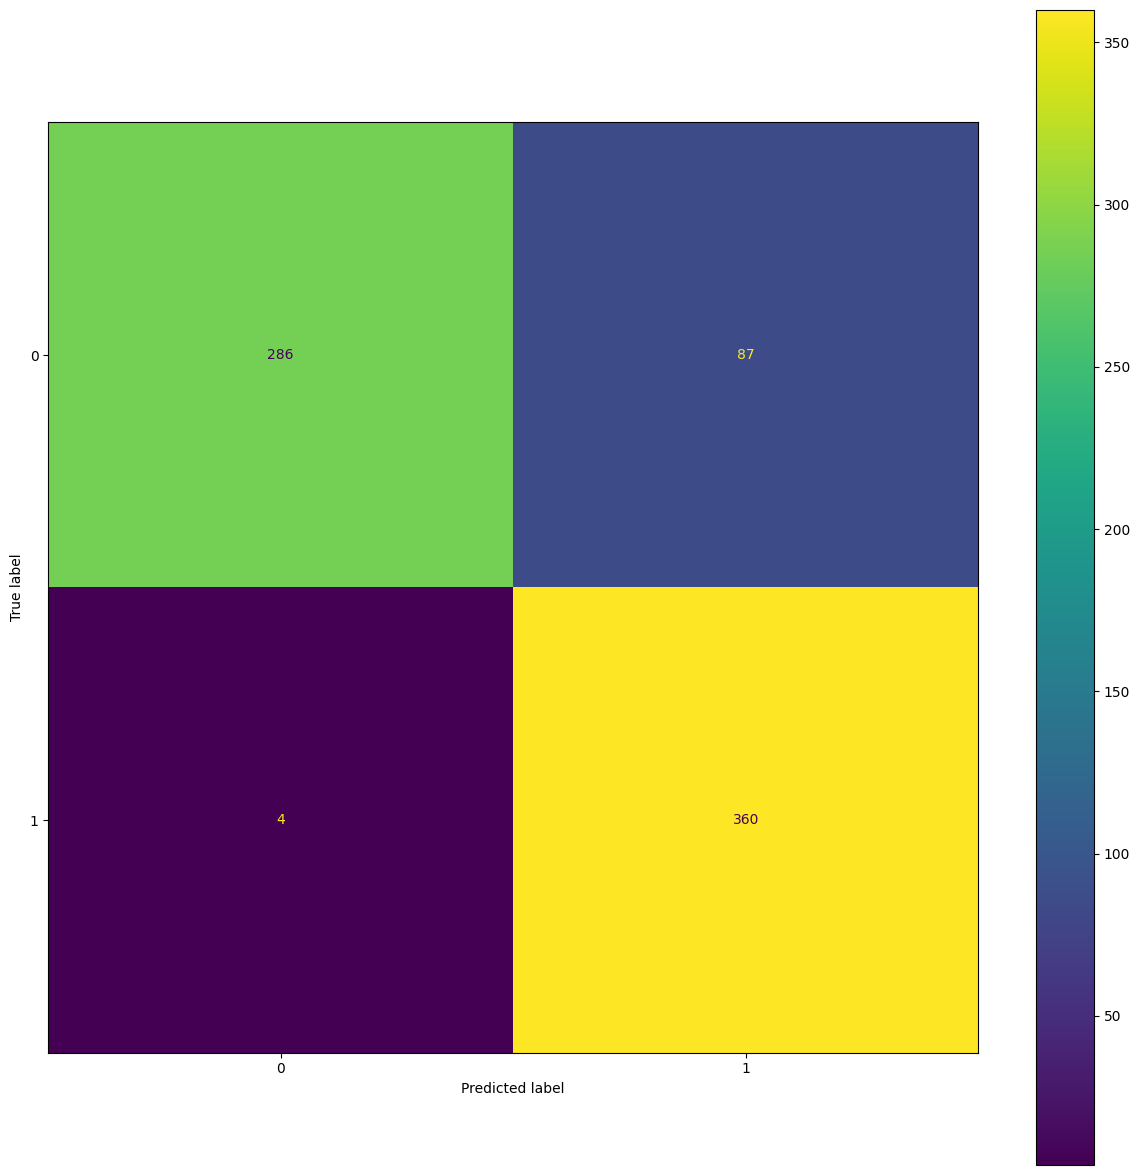

In [131]:
cm = confusion_matrix(y_test, y_pred_knn)
display = metrics.ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

**Support Vector Machine**

In [132]:
classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
score = classifier_svc.score(X_test, y_test)
print(score)

0.8317503392130258


In [133]:
y_pred_svc = classifier_svc.predict(X_test)
y_pred_svc

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [134]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       373
           1       0.81      0.86      0.84       364

    accuracy                           0.83       737
   macro avg       0.83      0.83      0.83       737
weighted avg       0.83      0.83      0.83       737



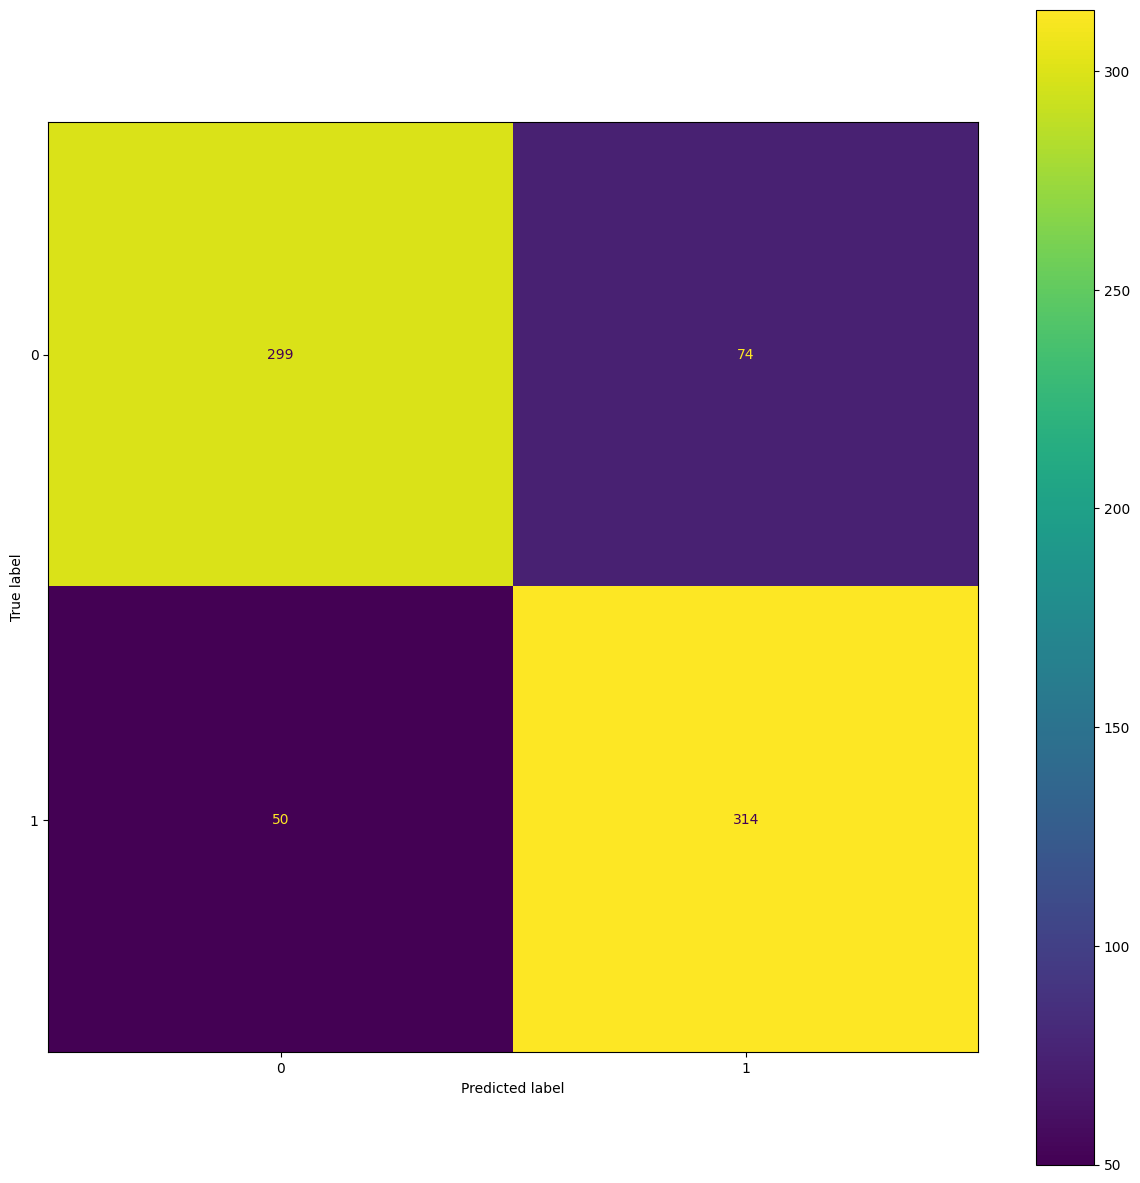

In [135]:
cm = confusion_matrix(y_test,y_pred_svc)
display = metrics.ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [158]:
from IPython.display import display
results = []
logistic_regression = LogisticRegression(max_iter=400)
logistic_regression.fit(X_train, y_train)
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = metrics.precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = metrics.recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = metrics.f1_score(y_test, y_pred_logistic, average='weighted')

results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_logistic,
    "Precision": precision_logistic,
    "Recall": recall_logistic,
    "F1 Score": f1_logistic
})


knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = metrics.precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = metrics.recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = metrics.f1_score(y_test, y_pred_knn, average='weighted')
results.append({
    "Model": "K-Nearest Neighbors",
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1 Score": f1_knn
})


classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
y_pred_svc = classifier_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = metrics.precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = metrics.recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = metrics.f1_score(y_test, y_pred_svc, average='weighted')
results.append({
    "Model": "Support Vector Machine",
    "Accuracy": accuracy_svc,
    "Precision": precision_svc,
    "Recall": recall_svc,
    "F1 Score": f1_svc
})


results_df = pd.DataFrame(results)
print("Summary of Model Performance:")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))
results_df.to_csv("model_performance_summary.csv", index=False)




Summary of Model Performance:
╒════╤════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model                  │   Accuracy │   Precision │   Recall │   F1 Score │
╞════╪════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ Logistic Regression    │   0.812754 │    0.815646 │ 0.812754 │   0.812461 │
├────┼────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ K-Nearest Neighbors    │   0.876526 │    0.896892 │ 0.876526 │   0.875116 │
├────┼────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ Support Vector Machine │   0.83175  │    0.833296 │ 0.83175  │   0.831639 │
╘════╧════════════════════════╧════════════╧═════════════╧══════════╧════════════╛
